In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import logging
import pickle
import os
import matplotlib.pyplot as plt
from striatum.bandit import linucb
from utils.miscellaneous import *
plt.style.use('seaborn')

In [3]:
logger = logging.getLogger(__name__)
logger.setLevel(logging.INFO)
formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
file_handler = logging.FileHandler('logs/linucb_modeling.log')
file_handler.setFormatter(formatter)
logger.addHandler(file_handler)

In [4]:
DATA_DIR_PATH = '/Users/a406127/Data/yahoo!_front_page_today_module_user_click_log/R6'
# DATA_DIR_PATH = '/home/aldente0630/Data/yahoo!_front_page_today_module_user_click_log/R6'
DATA_FILE_NAMES = ['ydata-fp-td-clicks-v1_0.20090503.gz', 'ydata-fp-td-clicks-v1_0.20090504.gz', 
                   'ydata-fp-td-clicks-v1_0.20090505.gz', 'ydata-fp-td-clicks-v1_0.20090506.gz',
                   'ydata-fp-td-clicks-v1_0.20090507.gz', 'ydata-fp-td-clicks-v1_0.20090508.gz',
                   'ydata-fp-td-clicks-v1_0.20090509.gz']

In [5]:
data_file_paths = []
for data_file_name in DATA_FILE_NAMES:
    data_file_paths.append(os.path.join(DATA_DIR_PATH, data_file_name))

In [6]:
policy_learner = PolicyLearner(linucb.LinUCB, context_dimension=6, alpha=0.2, seed=0, reset_freq=1000000)
param_grid = {'data_size': [0.01, 0.05, 0.1, 0.2, 0.3, 1]}

In [ ]:
results = search_param(logger, policy_learner, param_grid, parse_data_from_file, data_file_paths=data_file_paths,
                       share_coeff=False)

In [ ]:
with open('models/linucb_modeling.pkl', 'wb') as file:
    pickle.dump(results, file)

In [7]:
with open('models/linucb_modeling.pkl', 'rb') as file:
    results = pickle.load(file)

Best Parameter: {'data_size': 1.0}
Cumulative CTR: 6.3875%


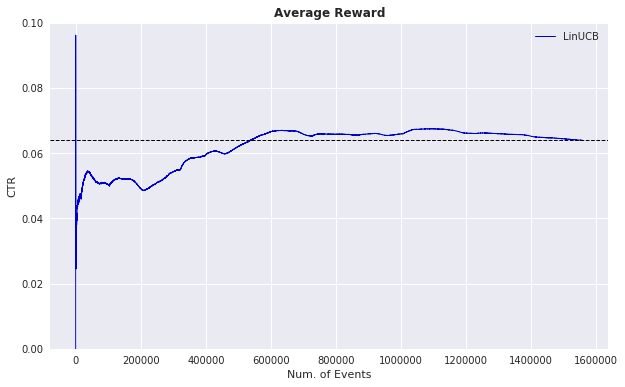

In [8]:
best_param = results['param'][np.argmax(results['avg_payoff'])]
cum_ctr = np.max(results['avg_payoff'])
print('Best Parameter: {0}\nCumulative CTR: {1:0.4%}'.format(best_param, cum_ctr))
fig, ax = plt.subplots(figsize=(10, 6))
_ = ax.plot(results['avg_payoff_seq'][np.argmax(results['avg_payoff'])], color='mediumblue', label='LinUCB', 
            linewidth=1)
ax.axhline(y=cum_ctr, color='black', linestyle='--', linewidth=1)
ax.set_xlabel('Num. of Events')
ax.set_ylabel('CTR')
ax.set_ylim([0.0, 0.1])
ax.legend(loc='best')
_ = ax.set_title('Average Reward', fontsize=12, fontweight='bold')